# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\finanzas01\appdata\local\programs\python\python311\lib\site-packages\httpcore-0.18.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\finanzas01\appdata\local\programs\python\python311\lib\site-packages\httpx-0.25.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\finanzas01\appdata\local\programs\python\python311\lib\site-packages\python_telegram_bot-20.5-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(f"Shape hh_income: {df_hh_income.shape}")
print(f"Shape pct_poverty: {df_pct_poverty.shape}")
print(f"Shape pct_completed_hs: {df_pct_completed_hs.shape}")
print(f"Shape share_race_city: {df_share_race_city.shape}")
print(f"Shape fatalities: {df_fatalities.shape}")

Shape hh_income: (29322, 3)
Shape pct_poverty: (29329, 3)
Shape pct_completed_hs: (29329, 3)
Shape share_race_city: (29268, 7)
Shape fatalities: (2535, 14)


In [6]:
print(f"hh_income columns: {df_hh_income.shape[1]} rows: {df_hh_income.shape[0]}")
print(f"pct_poverty columns: {df_pct_poverty.shape[1]} rows: {df_pct_poverty.shape[0]}")
print(f"pct_completed_hs columns: {df_pct_completed_hs.shape[1]} rows: {df_pct_completed_hs.shape[0]}")
print(f"share_race_city columns: {df_share_race_city.shape[1]} rows: {df_share_race_city.shape[0]}")
print(f"fatalities columns: {df_fatalities.shape[1]} rows: {df_fatalities.shape[0]}")

hh_income columns: 3 rows: 29322
pct_poverty columns: 3 rows: 29329
pct_completed_hs columns: 3 rows: 29329
share_race_city columns: 7 rows: 29268
fatalities columns: 14 rows: 2535


In [7]:
print(f"Name columns hh_income: {list(df_hh_income.columns)}")
print(f"Name columns pct_poverty: {list(df_pct_poverty.columns)}")
print(f"Name columns pct_completed_hs: {list(df_pct_completed_hs.columns)}")
print(f"Name columns share_race_city: {list(df_share_race_city.columns)}")
print(f"Name columns fatalities: {list(df_fatalities.columns)}")

Name columns hh_income: ['Geographic Area', 'City', 'Median Income']
Name columns pct_poverty: ['Geographic Area', 'City', 'poverty_rate']
Name columns pct_completed_hs: ['Geographic Area', 'City', 'percent_completed_hs']
Name columns share_race_city: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
Name columns fatalities: ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']


In [8]:
print(f"Values NaN hh_income: {df_hh_income.isna().values.any()}")
print(f"Values NaN pct_poverty: {df_pct_poverty.isna().values.any()}")
print(f"Values NaN pct_completed_hs: {df_pct_completed_hs.isna().values.any()}")
print(f"Values NaN share_race_city: {df_share_race_city.isna().values.any()}")
print(f"Values NaN fatalities: {df_fatalities.isna().values.any()}")

Values NaN hh_income: True
Values NaN pct_poverty: False
Values NaN pct_completed_hs: False
Values NaN share_race_city: False
Values NaN fatalities: True


In [9]:
print(f"Values duplicated hh_income: {df_hh_income.duplicated().any()}")
print(f"Values duplicated pct_poverty: {df_pct_poverty.duplicated().any()}")
print(f"Values duplicated pct_completed_hs: {df_pct_completed_hs.duplicated().any()}")
print(f"Values duplicated share_race_city: {df_share_race_city.duplicated().any()}")
print(f"Values duplicated fatalities: {df_fatalities.duplicated().any()}")

Values duplicated hh_income: False
Values duplicated pct_poverty: False
Values duplicated pct_completed_hs: False
Values duplicated share_race_city: False
Values duplicated fatalities: False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [10]:
df_hh_income

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667
...,...,...,...
29317,WY,Woods Landing-Jelm CDP,NaN
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500


In [11]:
df_hh_income['Median Income'] = pd.to_numeric(df_hh_income['Median Income'], errors='coerce')

In [12]:
df_hh_income['Median Income'].fillna(0, inplace=True)

C:\Users\FINANZAS01\AppData\Local\Temp\ipykernel_21868\2429363555.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hh_income['Median Income'].fillna(0, inplace=True)


In [13]:
df_hh_income

,Geographic Area,City,Median Income
0,AL,Abanda CDP,"11,207.00"
1,AL,Abbeville city,"25,615.00"
2,AL,Adamsville city,"42,575.00"
3,AL,Addison town,"37,083.00"
4,AL,Akron town,"21,667.00"
...,...,...,...
29317,WY,Woods Landing-Jelm CDP,0.00
29318,WY,Worland city,"41,523.00"
29319,WY,Wright town,"77,114.00"
29320,WY,Yoder town,"37,500.00"


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [14]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [15]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_poverty.dropna(inplace=True)
poverty_rate = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False).reset_index()

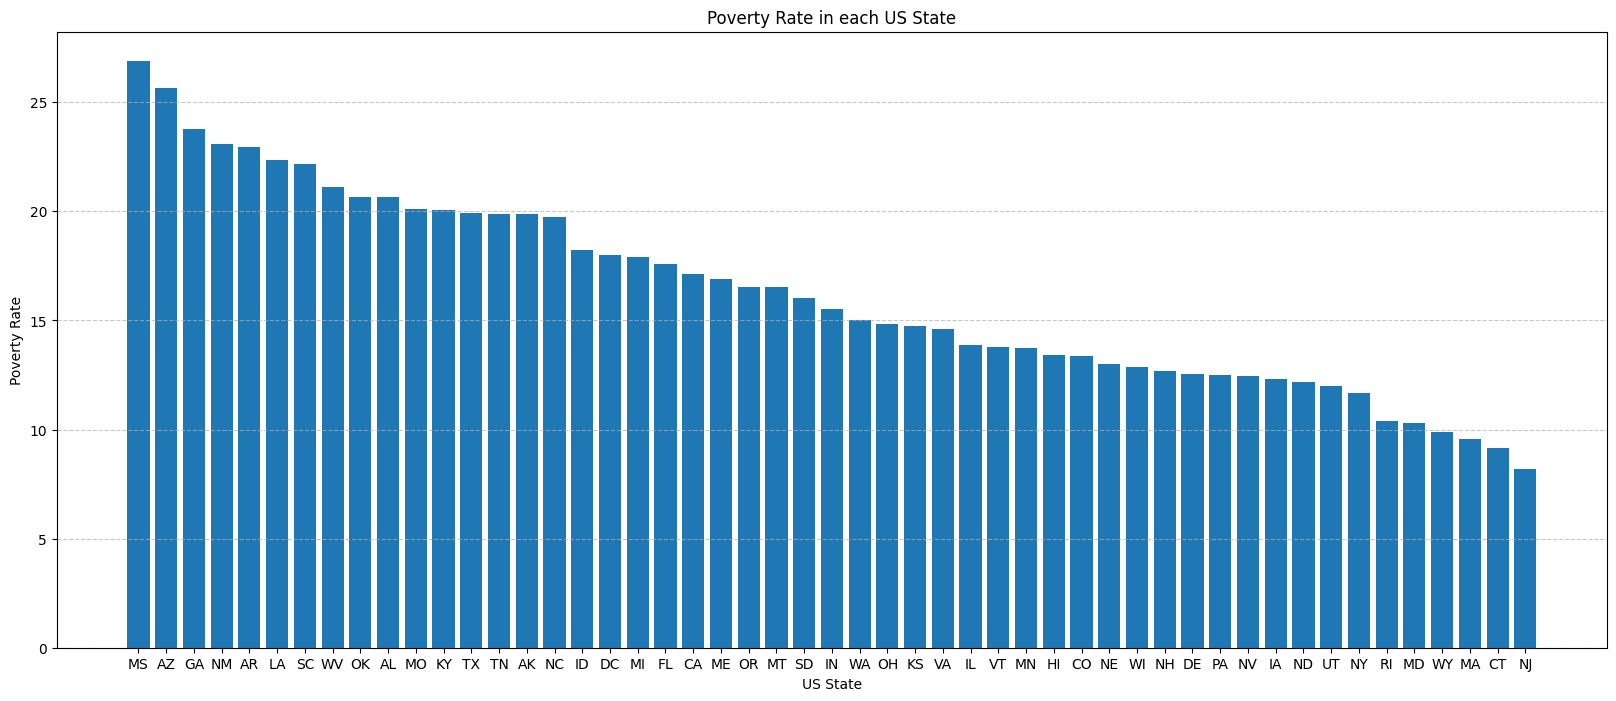

In [16]:
plt.figure(figsize=(20, 8))
plt.bar(poverty_rate['Geographic Area'], poverty_rate['poverty_rate'])
plt.xlabel("US State")
plt.ylabel("Poverty Rate")
plt.title("Poverty Rate in each US State")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [17]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
df_pct_completed_hs.dropna(inplace=True)
hs_graduation_rate = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values().reset_index()

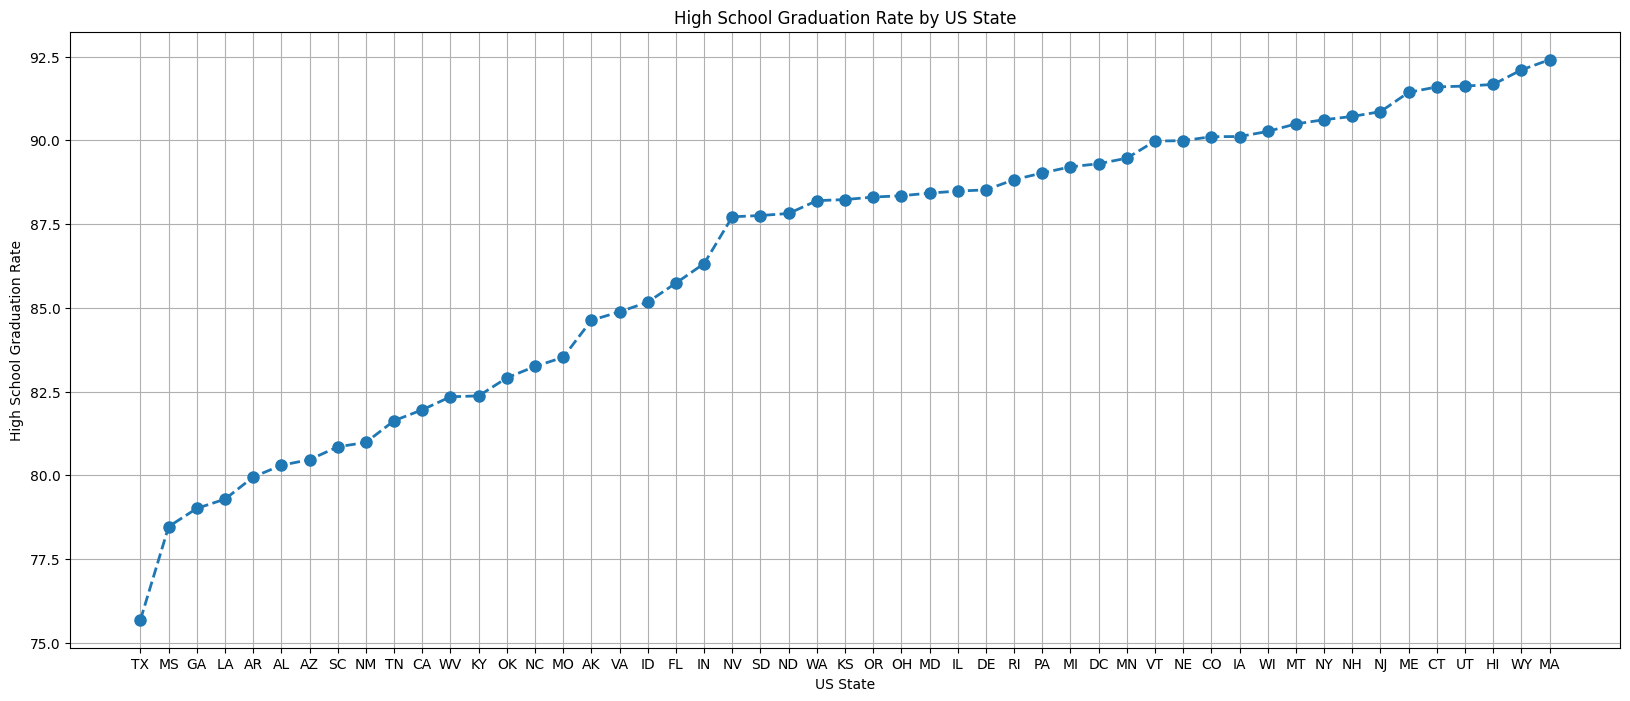

In [18]:
plt.figure(figsize=(20, 8))
plt.plot(hs_graduation_rate['Geographic Area'], hs_graduation_rate['percent_completed_hs'], linestyle='--', marker='o', markersize=8, linewidth=2)
plt.xlabel("US State")
plt.ylabel("High School Graduation Rate")
plt.title("High School Graduation Rate by US State")
plt.grid(True)
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [19]:

merged_df = poverty_rate.merge(hs_graduation_rate, on='Geographic Area')
merged_df.sort_values('percent_completed_hs', ascending=False, inplace=True)

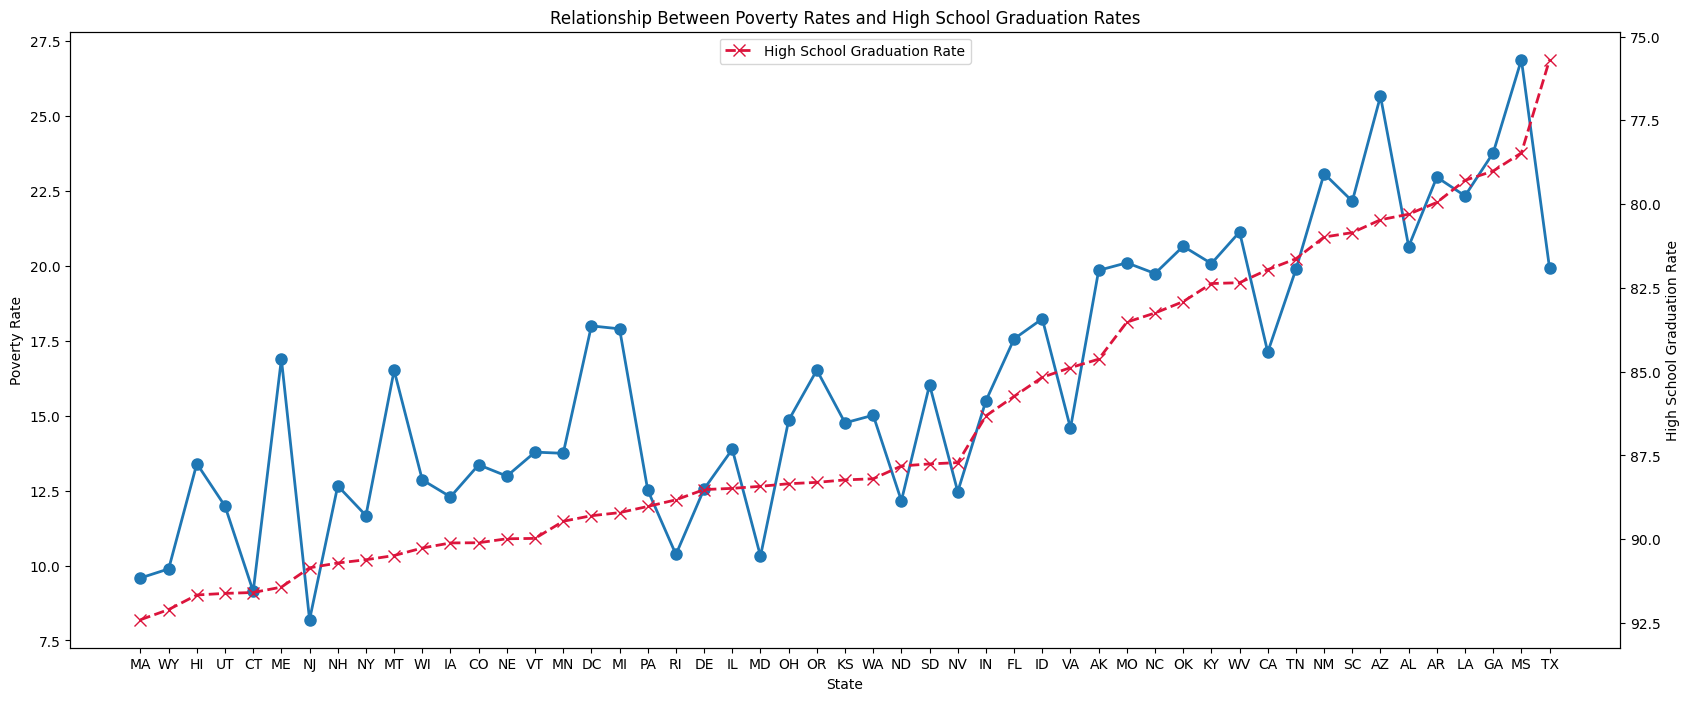

In [20]:
plt.figure(figsize=(20,8))
plt.title('Relationship Between Poverty Rates and High School Graduation Rates')

ax = plt.gca()
ax2 = ax.twinx()

ax.plot(merged_df['Geographic Area'], merged_df['poverty_rate'], label='Poverty Rate', linestyle='-', marker='o', markersize=8, linewidth=2)

ax2.plot(merged_df['Geographic Area'], merged_df['percent_completed_hs'], color='crimson', label='High School Graduation Rate', linestyle='--', marker='x', markersize=8, linewidth=2)

ax.set_ylabel('Poverty Rate')
ax.set_xlabel('State')
ax2.set_ylabel('High School Graduation Rate')

ax2.invert_yaxis()
plt.legend(loc='upper center')
ax.yaxis.grid(False)
ax2.grid(False)
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

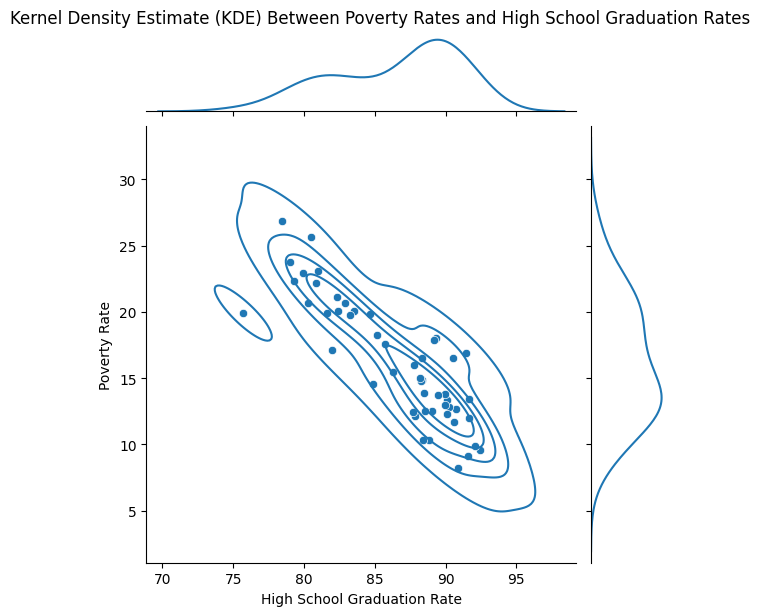

In [21]:
ax = sns.jointplot(merged_df, x="percent_completed_hs", y="poverty_rate", kind='kde', levels=6)
ax1 = ax.plot_joint(sns.scatterplot)

ax.fig.suptitle('Kernel Density Estimate (KDE) Between Poverty Rates and High School Graduation Rates', y=1.02)

plt.xlabel("High School Graduation Rate")
plt.ylabel("Poverty Rate")

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

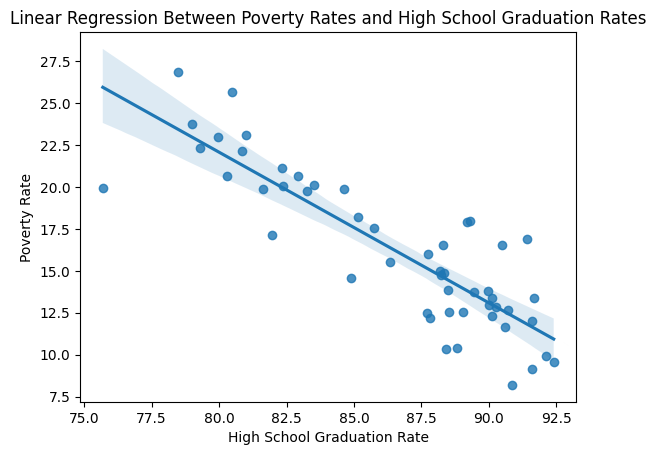

In [22]:
sns.regplot(merged_df, x="percent_completed_hs", y="poverty_rate")

plt.xlabel("High School Graduation Rate")
plt.ylabel("Poverty Rate")
plt.title('Linear Regression Between Poverty Rates and High School Graduation Rates')

plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [23]:
cols = ['share_white', 'share_black','share_native_american', 'share_asian', 'share_hispanic']
df_share_race_city[cols] = df_share_race_city[cols].apply(pd.to_numeric, errors='coerce')
df_share_race_city.dropna(inplace=True)
racial_makeup = df_share_race_city.groupby('Geographic area')[cols].mean().reset_index()
racial_makeup.rename(columns={'share_white': 'White', 'share_black': 'Black', 'share_native_american': 'Native American', 'share_asian': 'Asian', 'share_hispanic': 'Hispanic'}, inplace=True)

In [24]:
%pip install nbformat

DEPRECATION: Loading egg at c:\users\finanzas01\appdata\local\programs\python\python311\lib\site-packages\httpcore-0.18.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\finanzas01\appdata\local\programs\python\python311\lib\site-packages\httpx-0.25.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\finanzas01\appdata\local\programs\python\python311\lib\site-packages\python_telegram_bot-20.5-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [25]:

pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\finanzas01\appdata\local\programs\python\python311\lib\site-packages\httpcore-0.18.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\finanzas01\appdata\local\programs\python\python311\lib\site-packages\httpx-0.25.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\finanzas01\appdata\local\programs\python\python311\lib\site-packages\python_telegram_bot-20.5-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [26]:
fig = px.bar(racial_makeup,
    x="Geographic area",
    y=['White', 'Black', 'Native American', 'Asian', 'Hispanic'],
    title="Racial Makeup of Each US State",
    labels={"value": "Racial Makeup (%)", 'variable': 'Race', 'Geographic area': 'State'},
    barmode="stack",
)
fig.update_xaxes(tickangle=0)

fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [27]:
deaths_by_race = df_fatalities[df_fatalities['race'].notna()]
deaths_by_race = deaths_by_race['race'].value_counts()

In [28]:
fig = px.pie(names=deaths_by_race.index,
             values=deaths_by_race.values,
             title="Deaths by Race",
             hole=0.4,)

fig.update_traces(textfont_size=15, labels=['White', 'Black', 'Native American', 'Asian', 'Hispanic'])

fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [29]:

deaths_by_gender = df_fatalities['gender'].value_counts()

In [30]:
fig = px.bar(deaths_by_gender, x=deaths_by_gender.index,
             y=deaths_by_gender.values,
             color=deaths_by_gender.index,
             title="Deaths by Gender")
fig.update_xaxes(title_text='Gender', tickvals=[0, 1], ticktext=['MEN', 'WOMEN'])
fig.update_yaxes(title_text='Death Count')

fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [31]:
age_x_manner_of_death = df_fatalities[df_fatalities['age'].notna()]
age_x_manner_of_death = age_x_manner_of_death.groupby('gender')[['age', 'manner_of_death']].value_counts().reset_index(name='count')
age_x_manner_of_death['gender'].replace({'M': 'Man', 'F': 'Woman'}, inplace=True)

C:\Users\FINANZAS01\AppData\Local\Temp\ipykernel_21868\2958956189.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [32]:
fig = px.box(age_x_manner_of_death, x='manner_of_death', y='age', color='gender', color_discrete_map={'Woman': 'red', 'Man': 'blue'})
fig.update_layout(
    title="Manner of Death by Gender and Age",
    xaxis_title="Manner of Death",
    yaxis_title="Age",
    legend_title="Gender",
)
fig.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [33]:
people_armed = df_fatalities[df_fatalities['armed'].notna()]
unarmed_percentage = ((people_armed['armed'] == 'unarmed').sum() / people_armed['armed'].value_counts().sum()) * 100
people_armed = people_armed['armed'].value_counts()
print(f"Armed people killed: {round(100 - unarmed_percentage)}%")

Armed people killed: 93%


In [34]:
fig = px.bar(people_armed, x=people_armed.index, y=people_armed.values, log_y=True, color=people_armed.values)

fig.update_layout(
    title="Type of Weapon Carried",
    xaxis_title="Weapon",
    yaxis_title="Count",
)

fig.show()

In [35]:
gun = people_armed['gun']
unarmed = people_armed['unarmed']
print(f'People armed with guns killed by the police: {gun}')
print(f'People unarmed killed by the police: {unarmed}')

People armed with guns killed by the police: 1398
People unarmed killed by the police: 171


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [36]:
df_fatalities['race'].replace({'W': 'White', 'B': 'Black', 'N': 'Native American', 'A': 'Asian', 'H': 'Hispanic', 'O': 'Other'}, inplace=True)

killed_by_age = df_fatalities[df_fatalities['age'].notna()]
under_25 = killed_by_age[killed_by_age['age'] < 25].value_counts().sum()
total = killed_by_age.value_counts().sum()
percentage = (under_25/total) * 100
print(f'People killed under 25 years old: {round(percentage)}%')

People killed under 25 years old: 19%


C:\Users\FINANZAS01\AppData\Local\Temp\ipykernel_21868\486307847.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

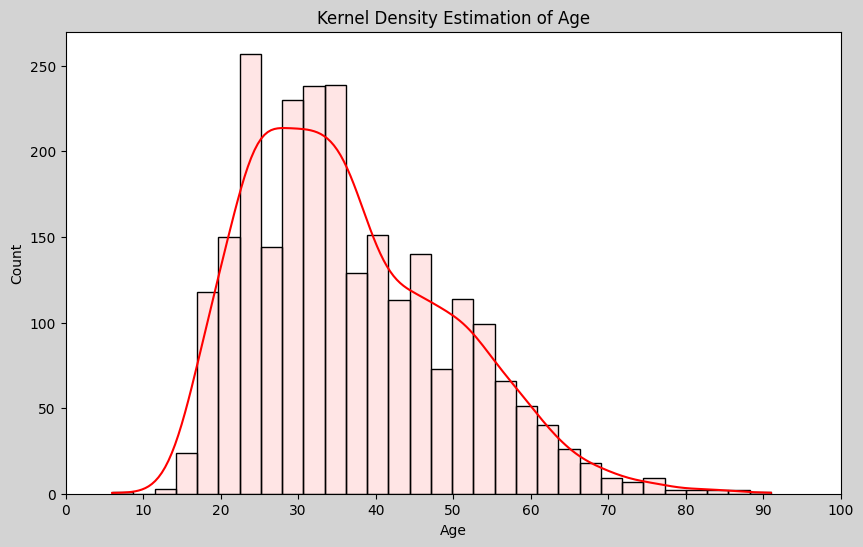

In [37]:
plt.figure(figsize=(10, 6), facecolor='lightgray')

sns.histplot(killed_by_age, x='age', kde=True, color='red', alpha=0.1)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Kernel Density Estimation of Age')
plt.xticks(range(0, 101, 10))

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

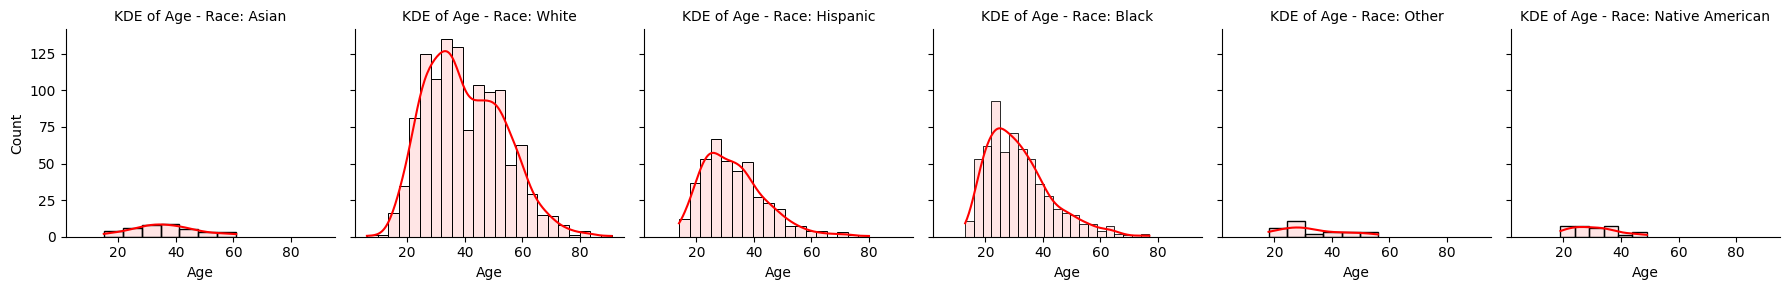

In [38]:
g = sns.FacetGrid(killed_by_age, col="race")
g.map(sns.histplot, 'age', kde=True, color='red', alpha=0.1)

g.set_axis_labels('Age', 'Count')
g.set_titles('KDE of Age - Race: {col_name}')

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [39]:
killed_by_race = df_fatalities[df_fatalities['race'].notna()]
killed_by_race = killed_by_race['race'].value_counts()

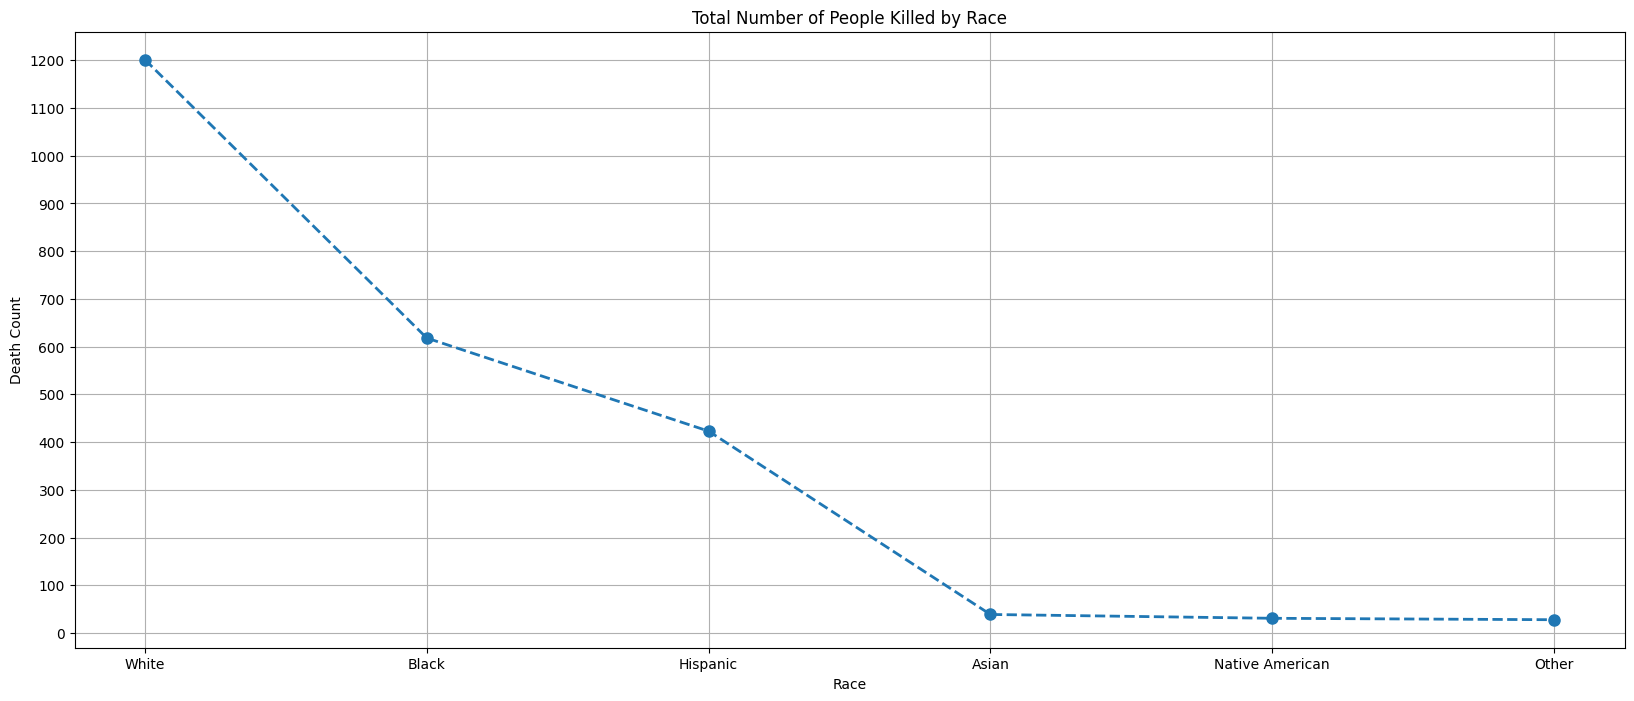

In [40]:
plt.figure(figsize=(20, 8))
plt.plot(killed_by_race, linestyle='--', marker='o', markersize=8, linewidth=2)
plt.xlabel("Race")
plt.ylabel("Death Count")
plt.title("Total Number of People Killed by Race")
plt.grid(True)
plt.yticks(range(0, killed_by_race.max(), 100))
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [41]:
percentage = (df_fatalities['signs_of_mental_illness'].sum() / df_fatalities['signs_of_mental_illness'].count()) * 100

In [42]:
print(f'Percentage of People Killed with Mental Illness: {round(percentage)}%')

Percentage of People Killed with Mental Illness: 25%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [43]:
top10_cities = df_fatalities[['state', 'city']].value_counts().head(10).reset_index(name='count')

In [44]:
fig = px.bar(top10_cities, x='city', y='count')

fig.update_layout(
    title="Top 10 Cities by Death Count",
    xaxis_title="City",
    yaxis_title="Death Count",
    showlegend=False
)

fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [45]:
merged_df = top10_cities.merge(df_fatalities, on=['state', 'city'])
merged_df = merged_df.groupby(['state', 'city', 'count'])['race'].value_counts(dropna=False).reset_index(name='death_race')
merged_df['death_race'] = round((merged_df['death_race'] / merged_df['count']) * 100)
merged_df = merged_df[merged_df['race'].isin(["Asian", "Black", "Hispanic", "Native American", "White"])]

In [46]:
cities = '|'.join(top10_cities['city'].tolist())
top10_cities_race = df_share_race_city[df_share_race_city['City'].str.contains(cities, case=False)]
for city in top10_cities['city']:
    city_variation = top10_cities_race['City'].str.contains(city, case=False)
    top10_cities_race.loc[city_variation, 'City'] = city
top10_cities_race = top10_cities_race.groupby(['Geographic area', 'City']).mean().reset_index()
top10_cities_race = top10_cities_race.merge(top10_cities, left_on=['Geographic area', 'City'], right_on=['state', 'city'])
top10_cities_race.drop(['Geographic area', 'City', 'count'], axis=1, inplace=True)
melted_df = top10_cities_race.melt(id_vars=["state", "city"], var_name="race", value_name="race_share")
race_mapping = {
    "share_white": "White",
    "share_black": "Black",
    "share_native_american": "Native American",
    "share_asian": "Asian",
    "share_hispanic": "Hispanic"
}
melted_df['race'] = melted_df['race'].replace(race_mapping)

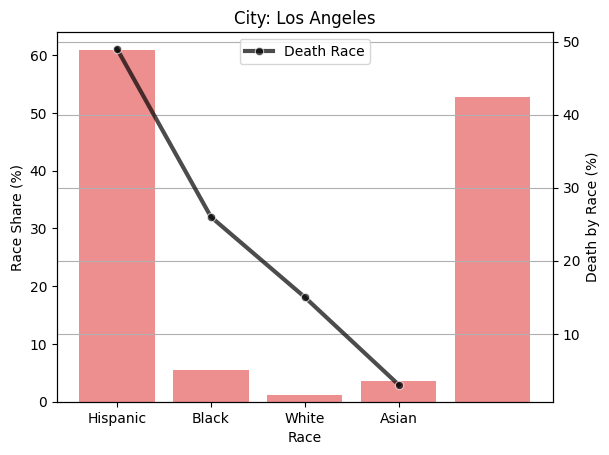

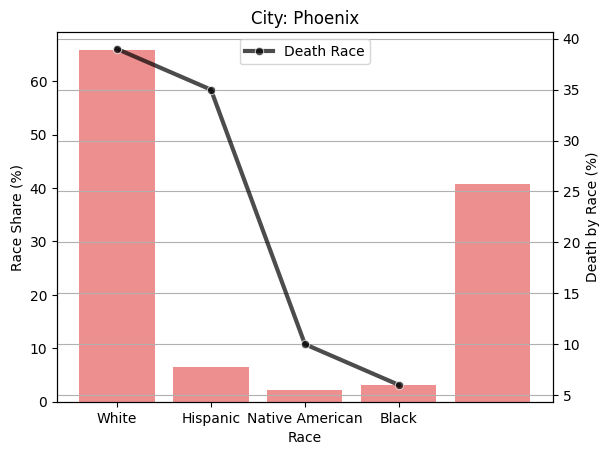

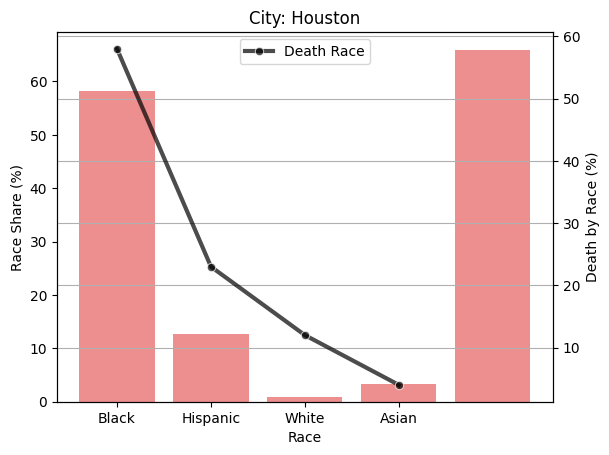

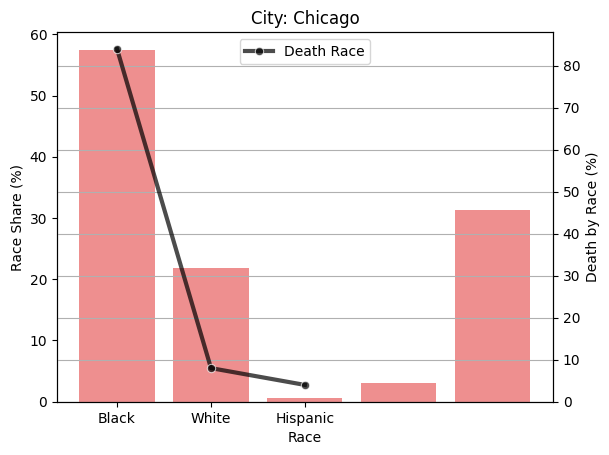

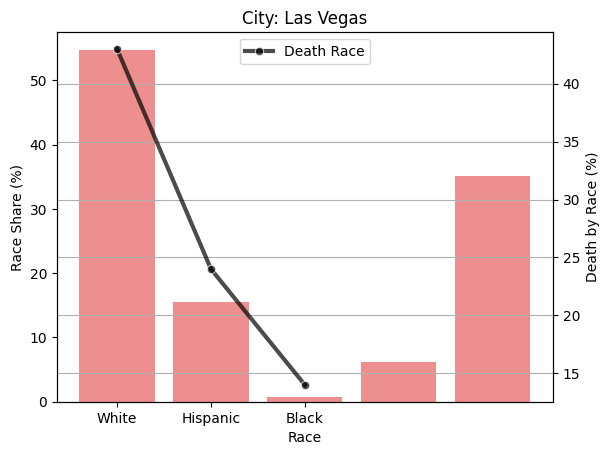

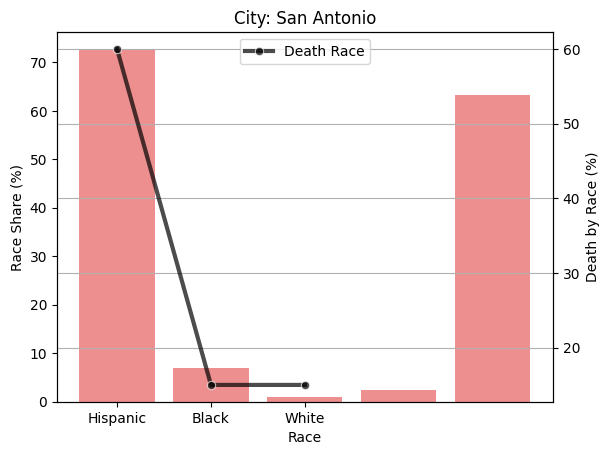

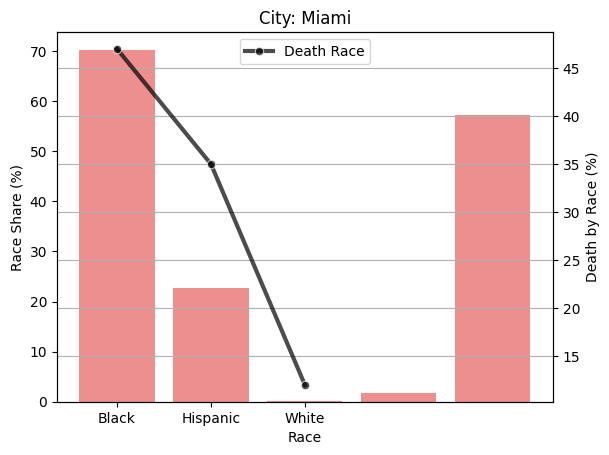

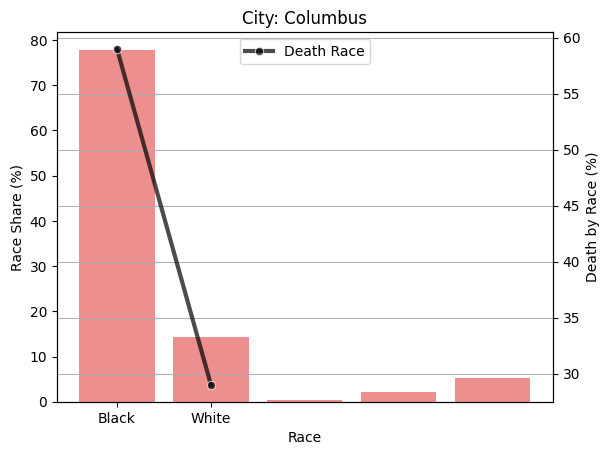

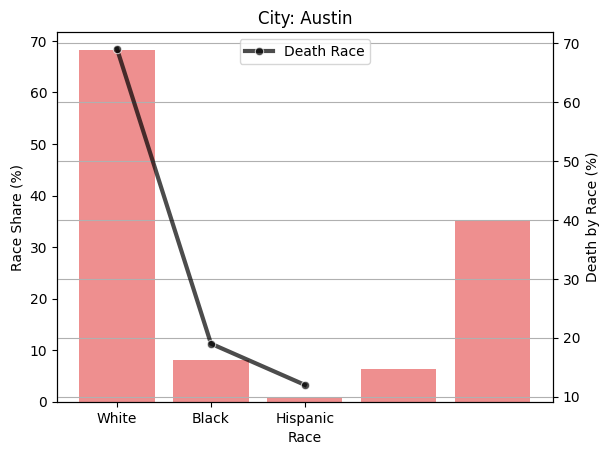

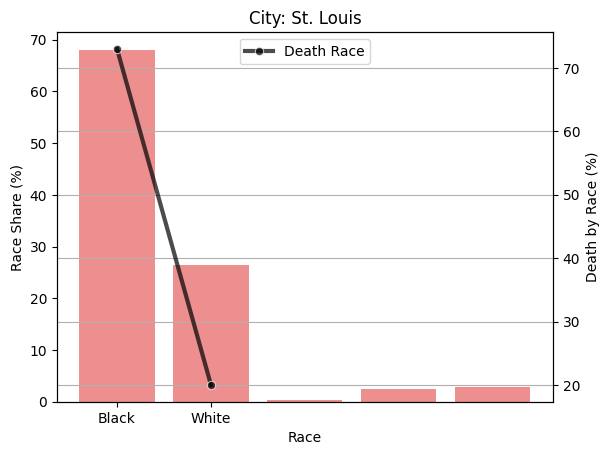

In [47]:
for city in top10_cities['city']:

    fig, ax = plt.subplots()

    sns.barplot(data=melted_df[melted_df['city'] == city], x='race', y='race_share', ax=ax, color='red', alpha=0.5)
    ax2 = ax.twinx()
    sns.lineplot(data=merged_df[merged_df['city'] == city], x='race', y='death_race', ax=ax2, color='black', alpha=0.7, marker='o', linewidth=3, label='Death Race')
    ax2.grid(None)

    ax.set_xlabel("Race")
    ax.set_ylabel("Race Share (%)")
    ax2.set_ylabel("Death by Race (%)")

    plt.legend(loc='upper center')
    plt.title(f'City: {city}')
    plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [48]:
deaths_by_state = df_fatalities.groupby('state')['id'].count().reset_index(name='count')

In [49]:
fig = px.choropleth(deaths_by_state, locations='state', color='count', locationmode="USA-states", scope="usa", title='Police Killings by US State', color_continuous_scale='Reds')
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [50]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

C:\Users\FINANZAS01\AppData\Local\Temp\ipykernel_21868\2723843298.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [51]:
deaths_over_time = df_fatalities.groupby('date').size().reset_index(name='count').sort_values('date')
deaths_over_time['year'] = deaths_over_time['date'].dt.year
deaths_over_time['month'] = deaths_over_time['date'].dt.month
deaths_over_time = deaths_over_time.groupby(['year', 'month'])['count'].sum().reset_index()

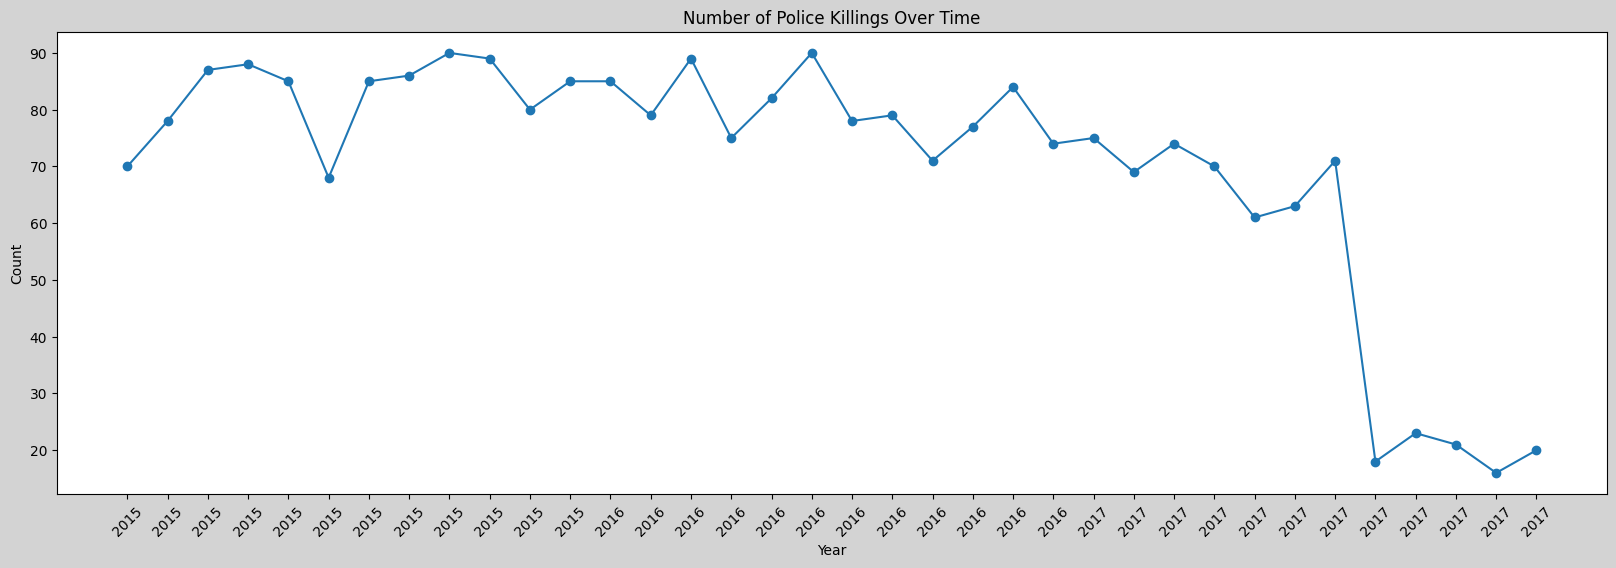

In [52]:
plt.figure(figsize=(20, 6), facecolor='lightgray')

plt.plot(deaths_over_time.index, deaths_over_time['count'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Police Killings Over Time')

plt.xticks(deaths_over_time.index, deaths_over_time.year, rotation=45)

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).